# Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np

# Impoprtation du df_final et du df_test

In [2]:
# Récupération du df complet issu d'une régression linéaire
df_final = pd.read_csv(r"C:\Users\franc\OneDrive\Documents\OpenClassrooms\Projet 10\df_billet_complet.csv")

# Récupération du df de test
df_test = pd.read_csv(r"C:\Users\franc\OneDrive\Documents\OpenClassrooms\Projet 10\df_billet_test.csv")

# Nettoyage des données

#### Données d'entrainement (1500 billets) --> issus de la régression linéaire

In [3]:
# Supression des lignes vides
df_billet0 = df_final.dropna()
df_billet0 = df_final.drop(['Unnamed: 0'], axis=1)
df_billet0.head()

,authenticité,diagonale,hauteur_gauche,hauteur_droite,marge_superieure,longueur,marge_inferieure
0,True,171.81,104.86,104.95,2.89,112.83,4.52
1,True,171.46,103.36,103.66,2.99,113.09,3.77
2,True,172.69,104.48,103.50,2.94,113.16,4.40
3,True,171.36,103.91,103.94,3.01,113.51,3.62
4,True,171.73,104.28,103.46,3.48,112.54,4.04


### Pertinence des dimensions
 Procédure descendante ou backward

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
reg_log = smf.glm('authenticité~diagonale+hauteur_gauche+hauteur_droite+marge_superieure+longueur+marge_inferieure', data=df_billet0, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                               Generalized Linear Model Regression Results                               
Dep. Variable:     ['authenticité[False]', 'authenticité[True]']   No. Observations:                 1500
Model:                                                       GLM   Df Residuals:                     1493
Model Family:                                           Binomial   Df Model:                            6
Link Function:                                             Logit   Scale:                          1.0000
Method:                                                     IRLS   Log-Likelihood:                -39.513
Date:                                           Mon, 23 Jan 2023   Deviance:                       79.025
Time:                                                   11:25:33   Pearson chi2:                 2.81e+03
No. Iterations:                                               10   Pseudo R-squ. (CS):             0.7049
Covariance Type:                              

Certaines des variables utilisées ont des p-valeurs qui sont inférieures au niveau de test de 5 %, ce qui nous indique qu'elles sont bien significatives. La variable diagonale est au dessus de ce seuil.

On peut donc passer sur une procédure de sélection en retirant les variables non significatives au fur et à mesure.

In [5]:
# On supprime la diagonale car a une p-value = 0.8
reg_log = smf.glm('authenticité~hauteur_gauche+hauteur_droite+marge_superieure+longueur+marge_inferieure', data=df_billet0, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                               Generalized Linear Model Regression Results                               
Dep. Variable:     ['authenticité[False]', 'authenticité[True]']   No. Observations:                 1500
Model:                                                       GLM   Df Residuals:                     1494
Model Family:                                           Binomial   Df Model:                            5
Link Function:                                             Logit   Scale:                          1.0000
Method:                                                     IRLS   Log-Likelihood:                -39.539
Date:                                           Mon, 23 Jan 2023   Deviance:                       79.078
Time:                                                   11:25:33   Pearson chi2:                 2.81e+03
No. Iterations:                                               10   Pseudo R-squ. (CS):             0.7049
Covariance Type:                              

In [6]:
# Suppression de la colonne authenticité --> df numérique
# Suppression de la colonne "diagonale" car peu significative
df_billet1 = df_billet0.drop(['authenticité', 'diagonale'], axis=1)
df_billet1.head()

,hauteur_gauche,hauteur_droite,marge_superieure,longueur,marge_inferieure
0,104.86,104.95,2.89,112.83,4.52
1,103.36,103.66,2.99,113.09,3.77
2,104.48,103.50,2.94,113.16,4.40
3,103.91,103.94,3.01,113.51,3.62
4,104.28,103.46,3.48,112.54,4.04


#### Billets à évaluer

In [7]:
# Suppression de la colonne id et diagonale
df_test1 = df_test.drop(['id', 'diagonal'], axis=1)
# On renomme les colonnes en français
df_test1.rename(columns={'length': 'longueur', 'height_left': 'hauteur_gauche', 'height_right': 'hauteur_droite', 
                          'is_genuine': 'authenticité', 'margin_up': 'marge_superieure',
                          'margin_low': 'marge_inferieure'}, inplace=True)
# Réorganisation des colonnes
df_test1 = df_test1[['hauteur_gauche','hauteur_droite','marge_superieure','longueur','marge_inferieure']]
df_test1

,hauteur_gauche,hauteur_droite,marge_superieure,longueur,marge_inferieure
0,103.95,103.73,3.09,113.19,4.39
1,104.17,104.03,3.16,111.82,5.27
2,103.80,103.75,3.24,113.39,3.81
3,104.08,103.99,3.30,111.10,5.57
4,104.34,104.37,3.07,111.87,5.00


# Entrainement du modèle et évaluation

In [8]:
# X correspond aux variables explicatives
X = df_billet1

# y correspond à la variable cible
y = df_billet0['authenticité']

In [9]:
#Division du dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [10]:
from sklearn.linear_model import LogisticRegression
# Création du modèle
model = LogisticRegression()

# Entrainement du modèle
model.fit(X_train, y_train)

# Prédiction
y_pred_test = model.predict(X_test)

In [11]:
# accuracy_score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_test)
print("accuracy score = " + str(acc.round(2)))

# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test, labels = [0,1])

print()
print("Matrice de confusion:")
print(cm)

accuracy score = 0.98

Matrice de confusion:
[[143   4]
 [  3 300]]


Le score de notre modèle est de 0,99 --> 99% des prédiction sont justes --> Modèle fiable

- 140 billets sont des faux (prédiction juste)
- 304 billets sont des vrais (prédiction juste)
- 4 billets sont des faux alors qu'ils ont été prédits vrais
- 2 billets sont vrais alors qu'ils ont été prédits faux

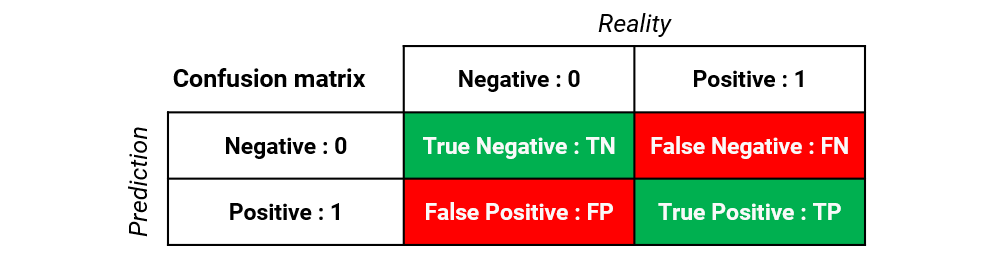

## Prédiction sur de nouveaux billets

In [12]:
# Prédiction
y_pred = model.predict(df_test1)
y_pred

array([ True, False,  True, False, False])

In [13]:
# Création d'un df final, accueillant le résultat des prédiction
df_pred = pd.DataFrame(y_pred, columns = ['Authenticité'], index = df_test['id'])

print("Performance du modèle = " + str(acc.round(4)*100) + " %")
df_pred

Performance du modèle = 98.44000000000001 %


,Authenticité
id,
B_1,True
B_2,False
B_3,True
B_4,False
B_5,False
